In [1]:
from datetime import datetime as dt
now = dt.now()
print("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M %p"))

Analysis on 2023-07-08 at 11:46 AM


In [2]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [7]:
df = pd.read_excel('http://lessRstats.com/data/employee.xlsx')
df.head()

,Name,Years,Gender,Dept,Salary,JobSat,Plan,Pre,Post
0,"Ritchie, Darnell",7.0,M,ADMN,53788.26,med,1,82,92
1,"Wu, James",NaN,M,SALE,94494.58,low,1,62,74
2,"Hoang, Binh",15.0,M,SALE,111074.86,low,3,96,97
3,"Jones, Alissa",5.0,F,NaN,53772.58,NaN,1,65,62
4,"Downs, Deborah",7.0,F,FINC,57139.90,high,2,90,86


View shape

In [8]:
df.shape

(37, 9)

Count categorical variables

In [9]:
df.Dept.value_counts()

SALE    15
ADMN     6
MKTG     6
ACCT     5
FINC     4
Name: Dept, dtype: int64

View proportions of categorical variables

In [11]:
df.Dept.value_counts(normalize=True)

SALE    0.416667
ADMN    0.166667
MKTG    0.166667
ACCT    0.138889
FINC    0.111111
Name: Dept, dtype: float64

Redefine JobSat as categorical data type instead of 'object'

In [13]:
df['JobSat'] = pd.Categorical(df['JobSat'], categories=['low', 'med', 'high'], ordered=True)
df.dtypes

Name        object
Years      float64
Gender      object
Dept        object
Salary     float64
JobSat    category
Plan         int64
Pre          int64
Post         int64
dtype: object

View crosstab to see distribution of M/F by department

In [14]:
pd.crosstab(df.Dept, df.Gender)

Gender,F,M
Dept,,
ACCT,3,2
ADMN,4,2
FINC,1,3
MKTG,5,1
SALE,5,10


In [15]:
# or
ct = pd.crosstab(df['Dept'], df['Gender'])
ct

Gender,F,M
Dept,,
ACCT,3,2
ADMN,4,2
FINC,1,3
MKTG,5,1
SALE,5,10


## Plotting Categorical Variables

Create a bar plot using countplot() that can be used to represent count of categorical variables

<Axes: xlabel='JobSat', ylabel='count'>

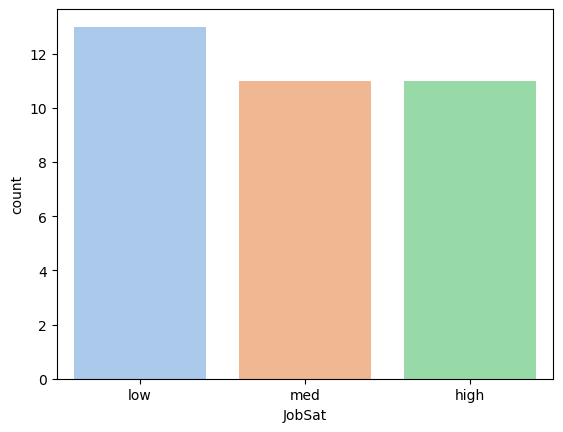

In [33]:
sns.countplot(x=df['JobSat'], order=['low', 'med', 'high'], palette=('pastel')) 

Create horizontal bar chart by placing the variable on the y axis

<Axes: xlabel='count', ylabel='JobSat'>

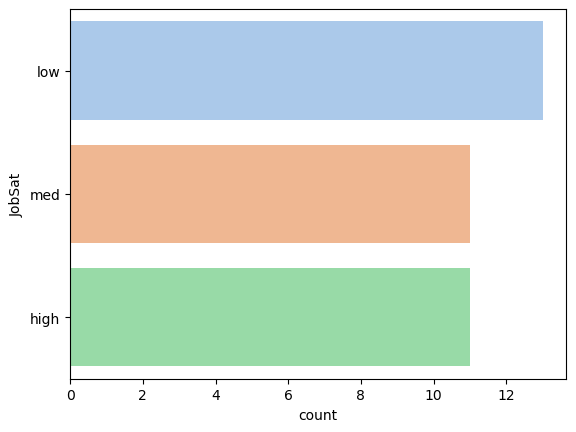

In [37]:
sns.countplot(y='JobSat', data=df, palette=('pastel'))

Use barplot() to represent two variables, one categorical and one continuous.

<Axes: xlabel='Dept', ylabel='Salary'>

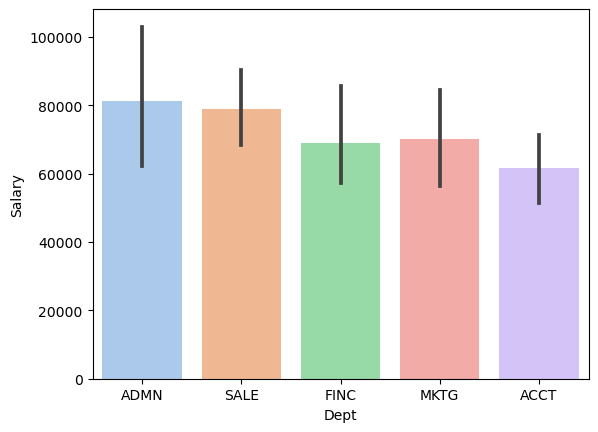

In [40]:
sns.barplot(data=df, x='Dept', y='Salary', palette=('pastel'))

Change the measure to median using the 'estimator' parameter. 

<Axes: xlabel='Dept', ylabel='Salary'>

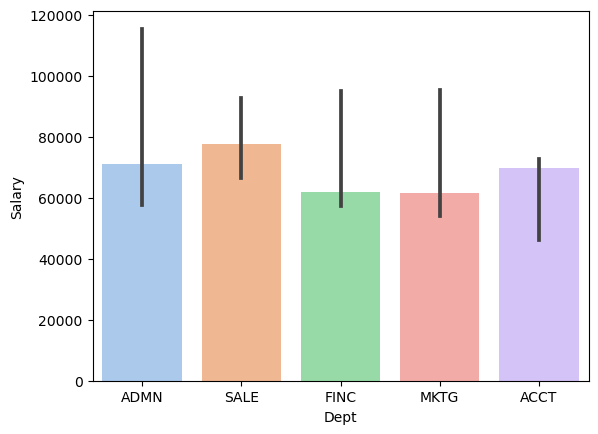

In [45]:
sns.barplot(data=df, x='Dept', y='Salary', palette=('pastel'), estimator=np.median)

Represent two categorical variables in a side-x-side bar plot or "unstacked" bar plot. Split colors of each variable by specifying the variable in the "hue" parameter.

<Axes: xlabel='Dept', ylabel='count'>

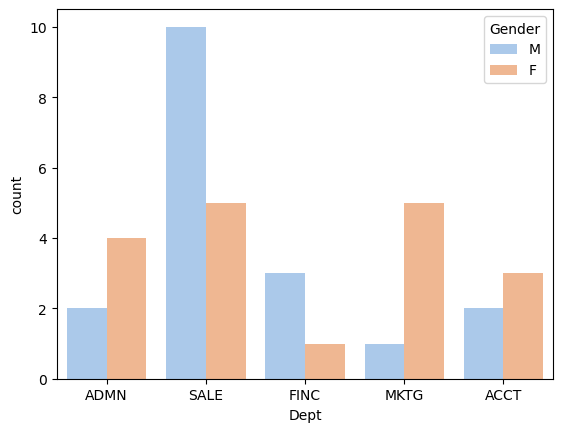

In [48]:
sns.countplot(data=df, x='Dept', hue='Gender', palette=('pastel'))

Attempt stacked bar chart with seaborn. Doesn't work.

<Axes: xlabel='Dept', ylabel='count'>

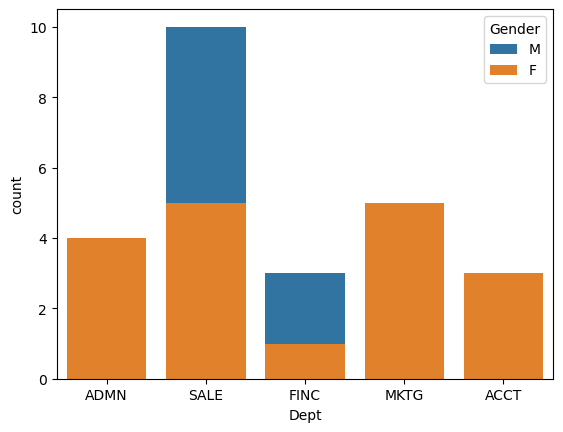

In [128]:
sns.countplot(x='Dept', hue='Gender', dodge=False, data=df)

When using matplotlib instead of seaborn, specify the plot type in the parameters along with the other specifications

<Axes: xlabel='Dept'>

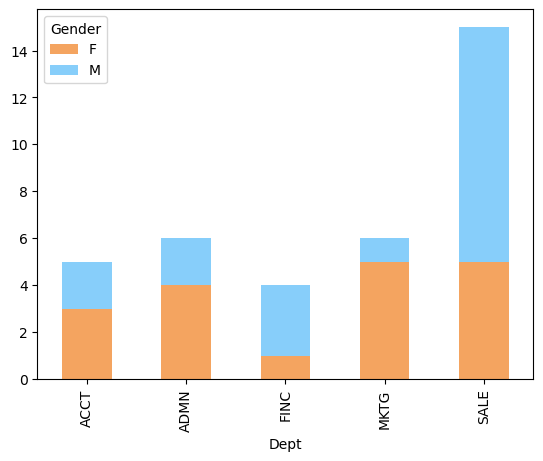

In [64]:
ct.plot(kind='bar', color=['sandybrown', 'lightskyblue'], stacked=True)

Create a 100% stacked bar chart using groupby(), value_counts(), and unstack('Gender').

To get a 100% stacked bar chart showing the percentage of Gender distributed across each department, set the normalize parameter to True

<Axes: xlabel='Dept'>

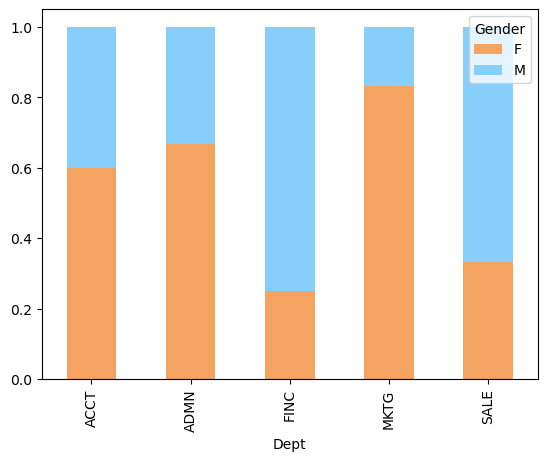

In [71]:
(df
 .groupby('Dept')['Gender']
 .value_counts(normalize=True)
 .unstack('Gender')
 .plot.bar(stacked=True, color=['sandybrown', 'lightskyblue']) 
 )

Apply barplot() to two categorical variables, specified with parameters of x and hue. Specify numeric variable on the y axis

<Axes: xlabel='Dept', ylabel='Salary'>

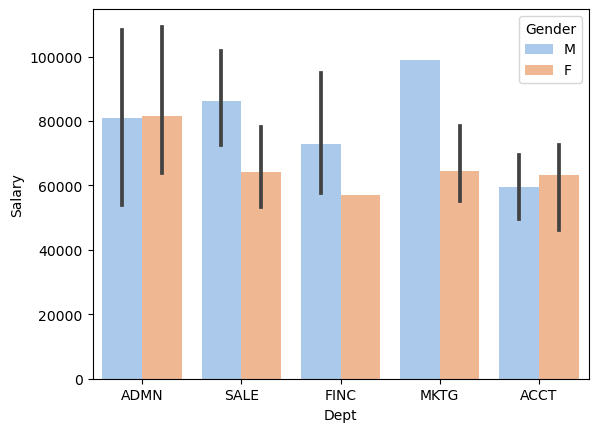

In [75]:
sns.barplot(data=df, x='Dept', y='Salary', hue='Gender', palette=('pastel'))

## Plotting Continuous Variables

### View the basic statistics

In [77]:
round(df['Salary'].mean(), 2)

73795.56

In [78]:
df.describe()

,Years,Salary,Plan,Pre,Post
count,36.000000,37.000000,37.000000,37.000000,37.000000
mean,9.388889,73795.556757,1.783784,78.783784,81.000000
std,5.723524,21799.533464,0.712396,12.037292,11.592622
min,1.000000,46124.970000,1.000000,59.000000,59.000000
25%,5.000000,56772.950000,1.000000,70.000000,72.000000
50%,9.000000,69547.600000,2.000000,80.000000,84.000000
75%,13.000000,87785.510000,2.000000,90.000000,91.000000
max,24.000000,134419.230000,3.000000,100.000000,100.000000


In [79]:
df['Salary'].describe()

count        37.000000
mean      73795.556757
std       21799.533464
min       46124.970000
25%       56772.950000
50%       69547.600000
75%       87785.510000
max      134419.230000
Name: Salary, dtype: float64

### Pivot Tables

Use groupby() to view mean salary across departments

In [80]:
df.groupby('Dept').mean()

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_16577/2931038006.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Dept').mean()


,Years,Salary,Plan,Pre,Post
Dept,,,,,
ACCT,5.600000,61792.776000,2.00,76.600000,78.600000
ADMN,10.166667,81277.116667,2.00,80.833333,82.000000
FINC,10.250000,69010.675000,1.75,79.750000,82.250000
MKTG,9.833333,70257.128333,2.00,79.666667,84.000000
SALE,10.285714,78830.064667,1.60,79.000000,81.133333


#### Multiple groupings
Split the previous table to distinguish "Male" vs. "Female" salary

In [81]:
df.groupby(['Dept', 'Gender']).mean()

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_16577/1370395092.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Dept', 'Gender']).mean()


Years        Salary      Plan        Pre       Post
Dept Gender                                                         
ACCT F        4.666667  63237.163333  2.000000  73.333333  77.333333
     M        7.000000  59626.195000  2.000000  81.500000  80.500000
ADMN F        7.500000  81434.002500  2.250000  80.000000  79.750000
     M       15.500000  80963.345000  1.500000  82.500000  86.500000
FINC F        7.000000  57139.900000  2.000000  90.000000  86.000000
     M       11.333333  72967.600000  1.666667  76.333333  81.000000
MKTG F        8.200000  64496.022000  1.800000  79.400000  84.000000
     M       18.000000  99062.660000  3.000000  81.000000  84.000000
SALE F        6.600000  64188.254000  1.600000  76.200000  78.600000
     M       12.333333  86150.970000  1.600000  80.400000  82.400000

Add mean and median to the previous query using the .agg function

In [84]:
# Wrapped in parenthasis in order to sparate code into multiple lines
(df
 .groupby(['Dept', 'Gender'])[['Years', 'Salary']]
 .agg([np.mean, np.median])
)
 

Years               Salary           
                  mean median          mean     median
Dept Gender                                           
ACCT F        4.666667    3.0  63237.163333  71084.020
     M        7.000000    7.0  59626.195000  59626.195
ADMN F        7.500000    5.0  81434.002500  71058.595
     M       15.500000   15.5  80963.345000  80963.345
FINC F        7.000000    7.0  57139.900000  57139.900
     M       11.333333   10.0  72967.600000  66312.890
MKTG F        8.200000    8.0  64496.022000  61356.690
     M       18.000000   18.0  99062.660000  99062.660
SALE F        6.600000    8.0  64188.254000  56508.320
     M       12.333333   13.0  86150.970000  82442.740

Use .pivot_table to create a pivot table aggregating 5 different variables. Specify the aggregate function as mean in the parameters. Specifying the "values" parameter determines which columns to analyze. Omitting "values" will include all numeric variables.

In [87]:
pd.pivot_table(data = df, values=['Years', 'Salary', 'Plan', 'Pre', 'Post'],
index=['Dept', 'Gender'], aggfunc=np.mean)

Plan       Post        Pre        Salary      Years
Dept Gender                                                         
ACCT F       2.000000  77.333333  73.333333  63237.163333   4.666667
     M       2.000000  80.500000  81.500000  59626.195000   7.000000
ADMN F       2.250000  79.750000  80.000000  81434.002500   7.500000
     M       1.500000  86.500000  82.500000  80963.345000  15.500000
FINC F       2.000000  86.000000  90.000000  57139.900000   7.000000
     M       1.666667  81.000000  76.333333  72967.600000  11.333333
MKTG F       1.800000  84.000000  79.400000  64496.022000   8.200000
     M       3.000000  84.000000  81.000000  99062.660000  18.000000
SALE F       1.600000  78.600000  76.200000  64188.254000   6.600000
     M       1.600000  82.400000  80.400000  86150.970000  12.333333

In [88]:
pd.pivot_table(data = df,
index=['Dept', 'Gender'], aggfunc=np.mean)

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_16577/1582774078.py:1: FutureWarning: The operation <function mean at 0x107e9dab0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  pd.pivot_table(data = df,


Plan       Post        Pre        Salary      Years
Dept Gender                                                         
ACCT F       2.000000  77.333333  73.333333  63237.163333   4.666667
     M       2.000000  80.500000  81.500000  59626.195000   7.000000
ADMN F       2.250000  79.750000  80.000000  81434.002500   7.500000
     M       1.500000  86.500000  82.500000  80963.345000  15.500000
FINC F       2.000000  86.000000  90.000000  57139.900000   7.000000
     M       1.666667  81.000000  76.333333  72967.600000  11.333333
MKTG F       1.800000  84.000000  79.400000  64496.022000   8.200000
     M       3.000000  84.000000  81.000000  99062.660000  18.000000
SALE F       1.600000  78.600000  76.200000  64188.254000   6.600000
     M       1.600000  82.400000  80.400000  86150.970000  12.333333

### Histogram

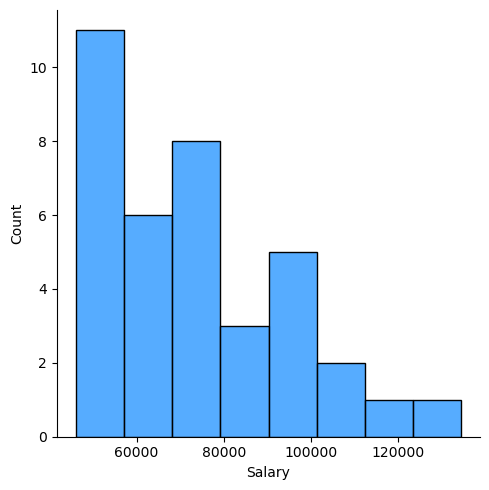

In [93]:
sns.displot(df, x='Salary', color='dodgerblue', bins=8)

Adding kde parameter includes a smoothed distribution curve

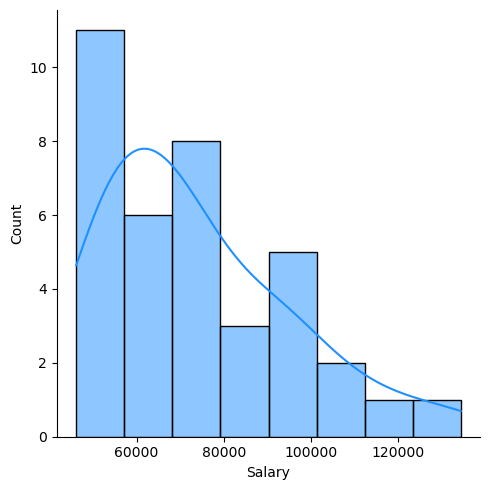

In [94]:
sns.displot(df, x='Salary', color='dodgerblue', bins=8, kde=True)

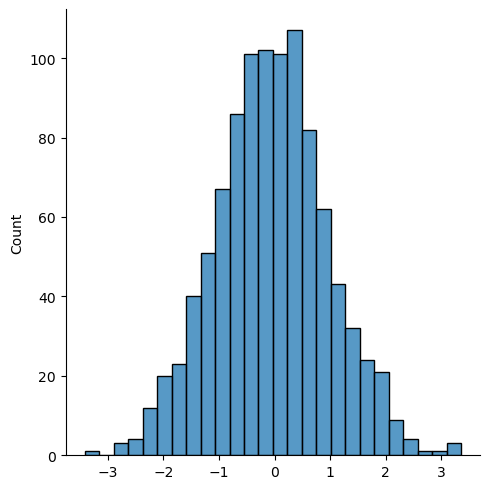

In [95]:
from numpy.random import normal
sim_data = normal(size=1000)
sns.displot(x=sim_data)

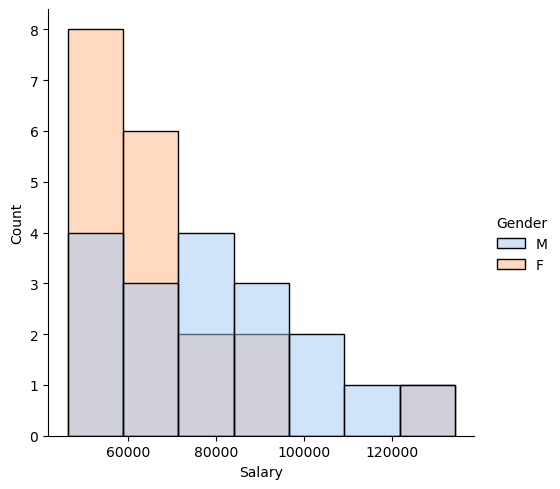

In [97]:
sns.displot(df, x='Salary', hue='Gender', palette=('pastel'))

Create a frequency polygon to show distribution of salary for Male vs. Female. Distinguish polygon in element parameter

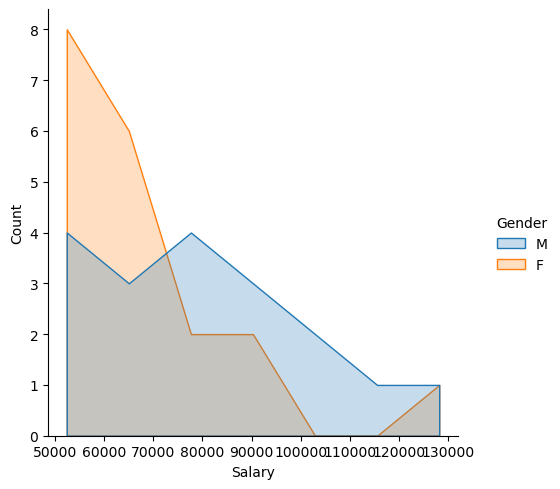

In [98]:
sns.displot(df, x='Salary', hue='Gender', element='poly')

Box plot is a good way to identify outliers for a single continuous variable.

Text(0.5, 0, 'Annual Salary')

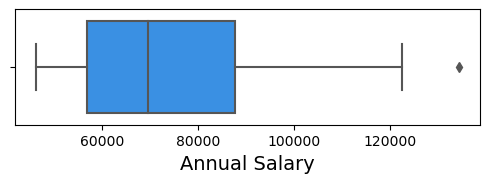

In [99]:
plt.figure(figsize=(6,1.5))
sns.boxplot(x=df['Salary'], color='dodgerblue')
plt.xlabel('Annual Salary', fontsize=14)

Visualize the distribution of a continuous variable across levels of a categorical variable.
Compare Salary across departments

<Axes: xlabel='Dept', ylabel='Salary'>

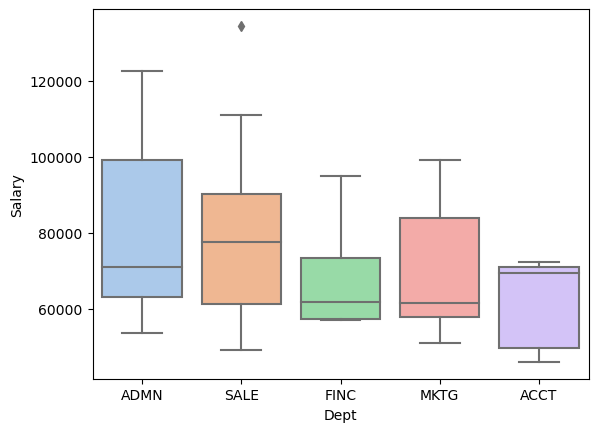

In [105]:
sns.boxplot(df, x='Dept', y='Salary', palette='pastel')

Split the previous box plot to identify salary by gender for each department

<Axes: xlabel='Dept', ylabel='Salary'>

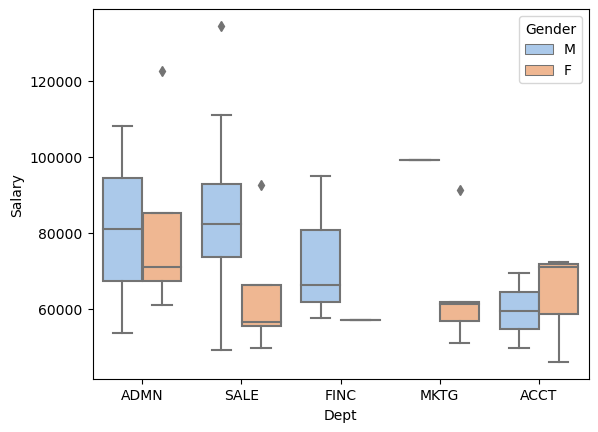

In [104]:
sns.boxplot(df, x='Dept', y='Salary', hue='Gender', palette='pastel')

### Correlational Structure

#### Scatterplot

Seaborn scatterplot is done using relplot(). Relationship plot.

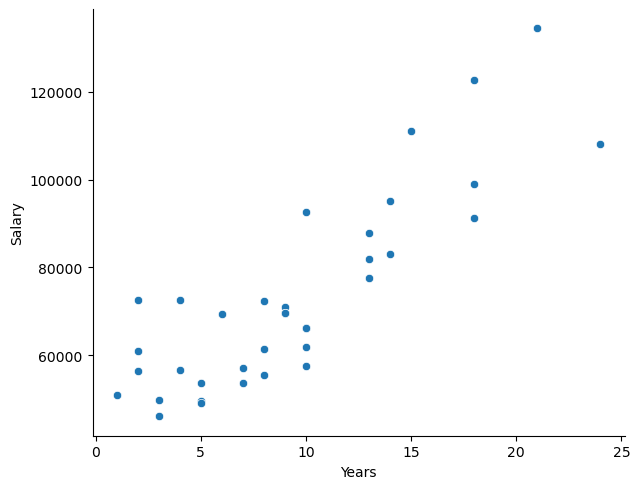

In [109]:
sns.relplot(df, x='Years', y='Salary', aspect=1.3)

Create a scatterplot to identify relationships of both Male and Female salaries. Control the size of the points with the 's' parameter.

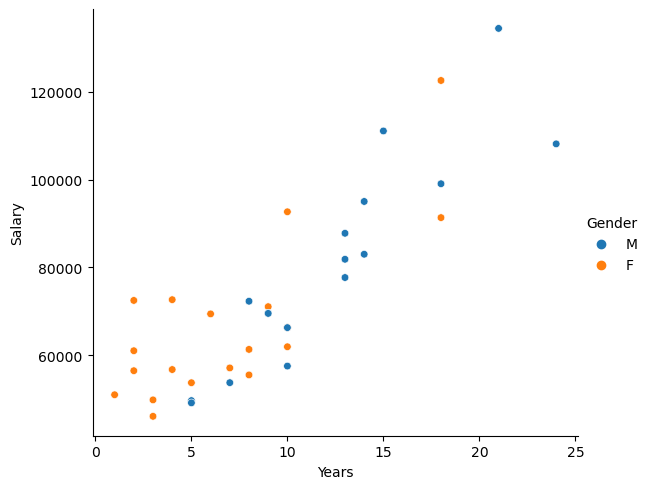

In [113]:
sns.relplot(df, x='Years', y='Salary', hue='Gender', s=30, aspect=1.2)

#### Correlation Matrix

Check the correlation between two variables.

In [115]:
df['Years'].corr(df['Salary']).round(2)

0.85

Create a correlation matrix of all numeric variables.

In [116]:
df.corr().round(2)

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_16577/1524431984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,Years,Salary,Plan,Pre,Post
Years,1.00,0.85,0.10,0.05,-0.07
Salary,0.85,1.00,0.18,-0.01,-0.07
Plan,0.10,0.18,1.00,0.02,-0.05
Pre,0.05,-0.01,0.02,1.00,0.91
Post,-0.07,-0.07,-0.05,0.91,1.00


#### Heat Map

Visuialization of the correlation matrix

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_16577/497388045.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), linewidths=2.0, annot=True)


<Axes: >

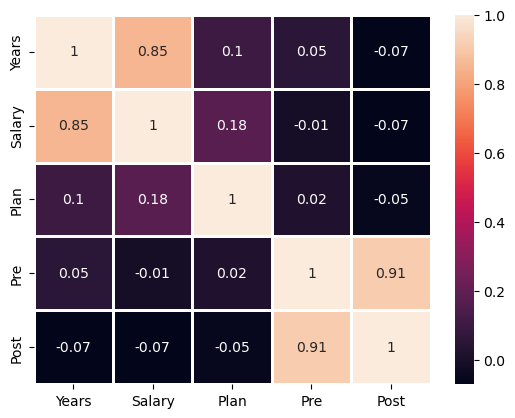

In [118]:
sns.heatmap(df.corr().round(2), linewidths=2.0, annot=True)

Or you can specify certain columns to keep in your plot if you do not want all numeric variables

<Axes: >

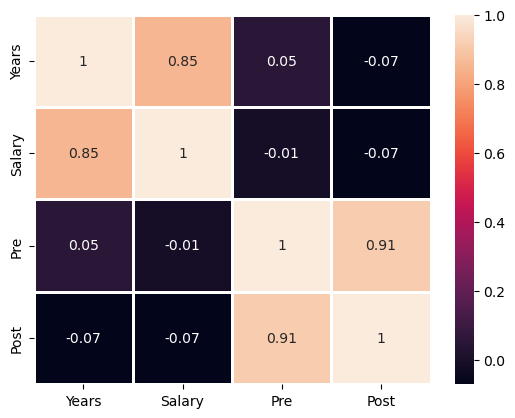

In [119]:
keep_vars = ['Years', 'Salary', 'Pre', 'Post']
df2 = df.loc[:, keep_vars]
sns.heatmap(df2.corr().round(2), linewidths=2.0, annot=True)

Scatterplot matrix

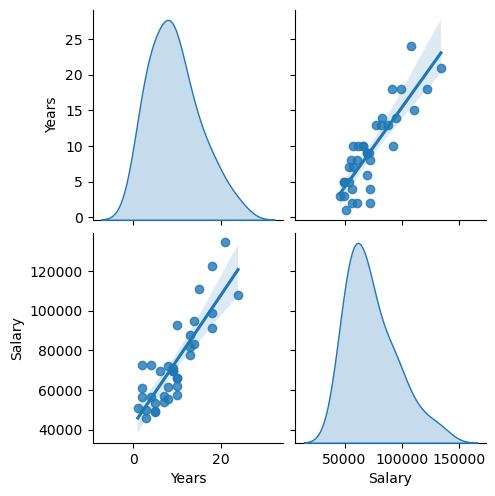

In [120]:
sns.pairplot(df, vars=['Years', 'Salary'], kind='reg', diag_kind='kde')

Pairplot for multiple levels of a categorical variable

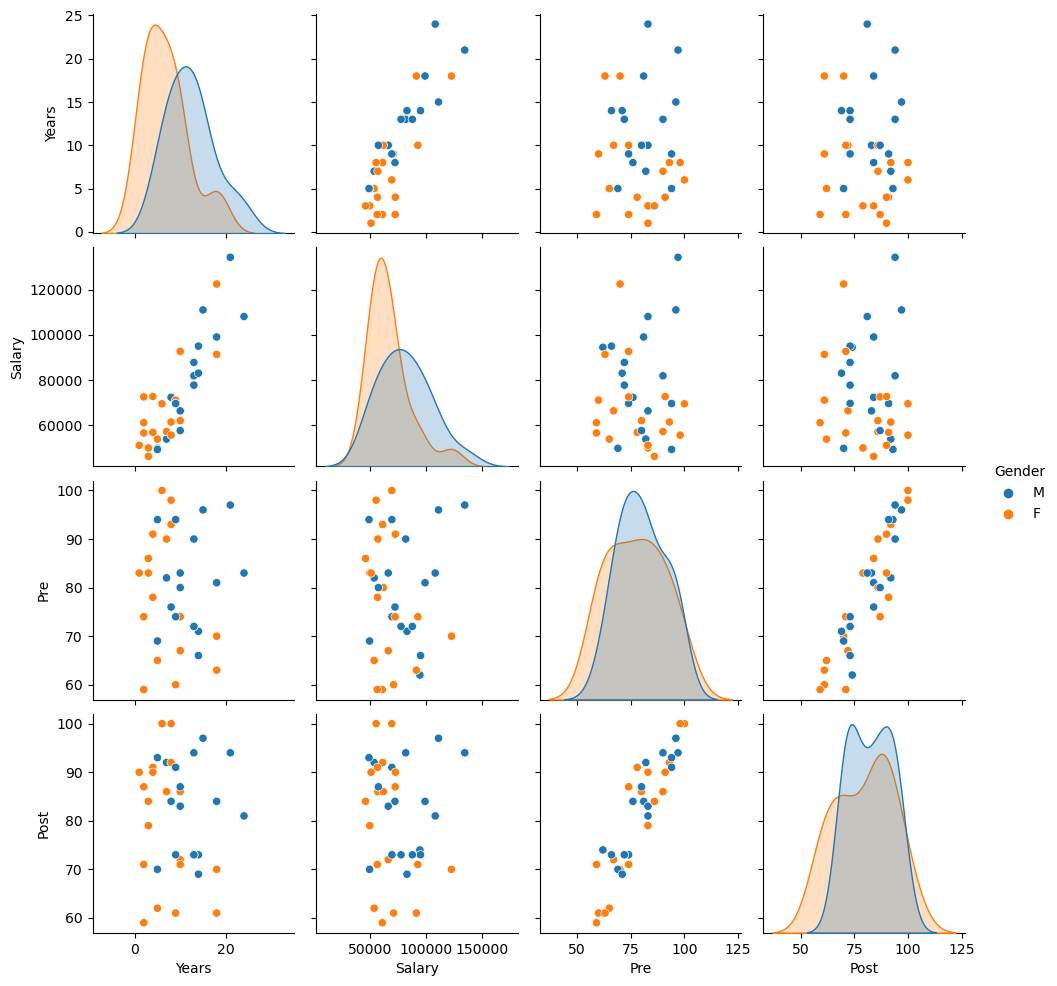

In [121]:
sns.pairplot(df, vars=['Years', 'Salary', 'Pre', 'Post'], hue='Gender')